In [1]:
import pandas as pd 

df = pd.read_csv("/kaggle/input/darwin/data.csv")
df = df.drop(columns=["ID"])
df['class'] = df['class'].replace({'P':1,'H':0})
df.head()

/tmp/ipykernel_18/1265945748.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'P':1,'H':0})


,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


# Cross-Validation (have no clue wtf was it)

In [2]:
# from sklearn.model_selection import KFold 
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression

# y = df['class']
# X = df.drop(columns=['class'])

# k = 7
# model = LinearRegression()
# kf = KFold(n_splits = k, shuffle = True, random_state = 42)
# results = cross_val_score(model, X,y, cv=kf, scoring="r2")

# print(results.mean())
# print(results.std())

# Holdout Validation (linear regression)

In [3]:
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import r2_score 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test,y_pred)
# print(r2)

(polynomial regression)

In [4]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import r2_score

# degree = 2
# f = PolynomialFeatures(degree = degree)
# X_poly_train = f.fit_transform(X_train)
# X_poly_test = f.transform(X_test)

# model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# model1.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test,y_pred)
# print(r2)

# PCA (this is underfitting now ah.)

In [5]:
# import numpy as np 
# from sklearn.decomposition import PCA 
# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

# k = 5

# pca = PCA(n_components=0.95)  # Retain 95% of variance
# model = LinearRegression()
# pipeline = make_pipeline(pca, model)


# kf = KFold(n_splits=k, shuffle=True, random_state=42)
# cv_results = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     cv_results.append(r2)

# cv_results = np.array(cv_results)
# print("Mean R^2 Score:", cv_results.mean())
# print("Standard Deviation of R^2 Score:", cv_results.std())

# Let's try random forest

In [6]:
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import KFold
# from sklearn.metrics import r2_score
# import numpy as np

# y = df['class']
# X = df.drop(columns=['class'])

# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

# k = 5

# pca = PCA(n_components=0.95)

# rf_model = RandomForestRegressor(n_estimators=42, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, max_features = 1.0, random_state=42)

# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# rf_cv_results = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)

#     rf_model.fit(X_train_pca, y_train.values.ravel())
#     rf_y_pred = rf_model.predict(X_test_pca)
#     rf_r2 = r2_score(y_test, rf_y_pred)
#     rf_cv_results.append(rf_r2)

# rf_cv_results = np.array(rf_cv_results)

# # Train the model
# rf_model.fit(X_train_pca, y_train.values.ravel())

# # Predictions on training set
# rf_train_pred = rf_model.predict(X_train_pca)
# rf_train_r2 = r2_score(y_train, rf_train_pred)
# print("Training set R^2 score:", rf_train_r2)

# # Predictions on test set
# rf_test_pred = rf_model.predict(X_test_pca)
# rf_test_r2 = r2_score(y_test, rf_test_pred)
# print("Test set R^2 score:", rf_test_r2)

In [7]:

# # Define the random forest model with adjusted parameters
# rf_model = RandomForestRegressor(n_estimators=50, 
#                                   max_depth=10,  # Adjust the maximum depth of the trees
#                                   min_samples_split=5,  # Adjust the minimum number of samples required to split a node
#                                   min_samples_leaf=2,   # Adjust the minimum number of samples required to be at a leaf node
#                                   max_features=0.7,  # You can also adjust the number of features to consider when looking for the best split
#                                   random_state=42)

# # Train the model on the training data
# rf_model.fit(X_train_pca, y_train.values.ravel())

# # Predict on the training set
# train_predictions = rf_model.predict(X_train_pca)

# # Predict on the test set
# test_predictions = rf_model.predict(X_test_pca)

# # Calculate R-squared scores
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# print("Training set R^2 score:", train_r2)
# print("Test set R^2 score:", test_r2)


In [8]:
# from sklearn.ensemble import GradientBoostingRegressor

# # Gradient Boosting Regression
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# gb_cv_results = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     gb_model.fit(X_train, y_train.values.ravel())
#     gb_y_pred = gb_model.predict(X_test)
#     gb_r2 = r2_score(y_test, gb_y_pred)
#     gb_cv_results.append(gb_r2)

# gb_cv_results = np.array(gb_cv_results)

# print("Gradient Boosting Regression:")
# print("Mean R^2 Score:", gb_cv_results.mean())
# print("Standard Deviation of R^2 Score:", gb_cv_results.std())


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

y = df['class']
X = df.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_model = GradientBoostingRegressor(learning_rate=0.2, n_estimators=100, 
                                            max_depth=5, min_samples_split=5, 
                                            min_samples_leaf=2, max_features='sqrt', 
                                            random_state=42)

gb_model.fit(X_train, y_train)

train_r2 = gb_model.score(X_train, y_train)
print("Training set R^2 score:", train_r2)

test_r2 = gb_model.score(X_test, y_test)
print("Test set R^2 score:", test_r2)

Training set R^2 score: 0.999999999961367
Test set R^2 score: 0.5202506944910893


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

gb_classifier = GradientBoostingClassifier(learning_rate=0.3, n_estimators=100, 
                                           max_depth=5, min_samples_split=5, 
                                           min_samples_leaf=2, max_features='sqrt', 
                                           random_state=42)


gb_classifier.fit(X_train, y_train)

y_train_pred_gb = gb_classifier.predict(X_train)

y_test_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

# Calculate precision
train_precision_gb = precision_score(y_train, y_train_pred_gb)
test_precision_gb = precision_score(y_test, y_test_pred_gb)

# Calculate recall
train_recall_gb = recall_score(y_train, y_train_pred_gb)
test_recall_gb = recall_score(y_test, y_test_pred_gb)

# Calculate F1-score
train_f1_gb = f1_score(y_train, y_train_pred_gb)
test_f1_gb = f1_score(y_test, y_test_pred_gb)

print("Gradient Boosting Classifier:")
print("Training set accuracy:", train_accuracy_gb)
print("Test set accuracy:", test_accuracy_gb)
print("Training set precision:", train_precision_gb)
print("Test set precision:", test_precision_gb)
print("Training set recall:", train_recall_gb)
print("Test set recall:", test_recall_gb)
print("Training set F1-score:", train_f1_gb)
print("Test set F1-score:", test_f1_gb)

Gradient Boosting Classifier:
Training set accuracy: 1.0
Test set accuracy: 0.8857142857142857
Training set precision: 1.0
Test set precision: 0.9444444444444444
Training set recall: 1.0
Test set recall: 0.85
Training set F1-score: 1.0
Test set F1-score: 0.8947368421052632


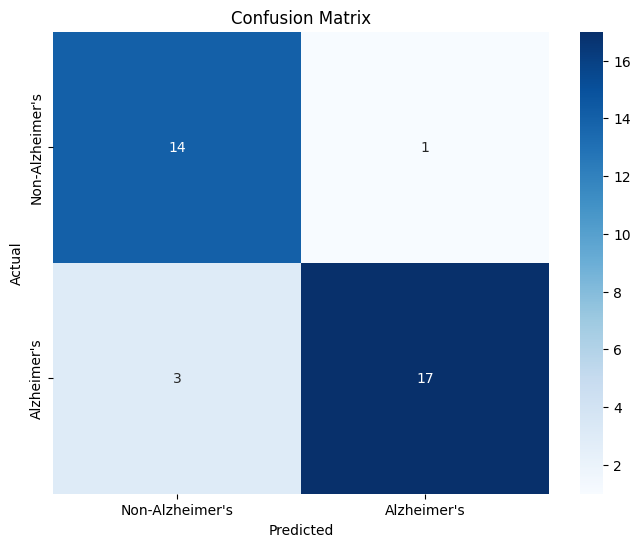

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_gb)

labels = ['True Neg','False Pos','False Neg','True Pos']

cm = cm.reshape(2,2)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Alzheimer\'s', 'Alzheimer\'s'], yticklabels=['Non-Alzheimer\'s', 'Alzheimer\'s'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()